In [243]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
%matplotlib inline

In [244]:
data = pd.read_csv('C:/Users/avgon/Desktop/go_track_track_full.csv')
data.head()

,id,id_android,speed,time,distance,rating,rating_bus,rating_weather,car_or_bus,linha,Unnamed: 10,Unnamed: 11,Unnamed: 12,latitude,longitude,track_id,datetime
0,1.0,0.0,19.210586,0.138049,2.652,3.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,-10.939341,-37.062742,1,9/13/2014 7:24
1,2.0,0.0,30.848229,0.171485,5.290,3.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,-10.939341,-37.062742,1,9/13/2014 7:24
2,3.0,1.0,13.560101,0.067699,0.918,3.0,0.0,0.0,2.0,NaN,NaN,NaN,NaN,-10.939324,-37.062765,1,9/13/2014 7:24
3,4.0,1.0,19.766679,0.389544,7.700,3.0,0.0,0.0,2.0,NaN,NaN,NaN,NaN,-10.939211,-37.062843,1,9/13/2014 7:24
4,8.0,0.0,25.807401,0.154801,3.995,2.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,-10.938939,-37.062879,1,9/13/2014 7:24


In [245]:
print('Datatypes: ' +str(data.dtypes))

Datatypes: id                float64
id_android        float64
speed             float64
time              float64
distance          float64
rating            float64
rating_bus        float64
rating_weather    float64
car_or_bus        float64
linha              object
Unnamed: 10       float64
Unnamed: 11       float64
Unnamed: 12       float64
latitude          float64
longitude         float64
track_id            int64
datetime           object
dtype: object


In [246]:
print("Records: " +str(data.count))

Records: <bound method DataFrame.count of         id  id_android      speed      time  distance  rating  rating_bus  \
0      1.0         0.0  19.210586  0.138049     2.652     3.0         0.0   
1      2.0         0.0  30.848229  0.171485     5.290     3.0         0.0   
2      3.0         1.0  13.560101  0.067699     0.918     3.0         0.0   
3      4.0         1.0  19.766679  0.389544     7.700     3.0         0.0   
4      8.0         0.0  25.807401  0.154801     3.995     2.0         0.0   
...    ...         ...        ...       ...       ...     ...         ...   
18102  NaN         NaN        NaN       NaN       NaN     NaN         NaN   
18103  NaN         NaN        NaN       NaN       NaN     NaN         NaN   
18104  NaN         NaN        NaN       NaN       NaN     NaN         NaN   
18105  NaN         NaN        NaN       NaN       NaN     NaN         NaN   
18106  NaN         NaN        NaN       NaN       NaN     NaN         NaN   

       rating_weather  car_or_bus

Each cathegory within rating column: 
rating
1.0     17
2.0     45
3.0    101
dtype: int64


Text(0, 0.5, 'Frequency')

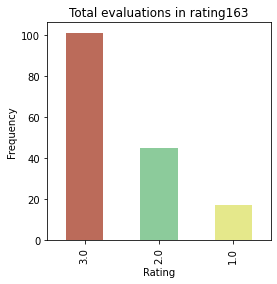

In [247]:
print("Each cathegory within rating column: " )
print(data.groupby(['rating']).size())
index = ['1','2','3']
data_plot = data['rating'].value_counts(sort=True, ascending=False).plot(kind='bar', figsize=(4,4),title="Total evaluations in rating"
                                                                        +str(data['rating'].count()), color =['#BB6B5A', '#8CCB9B', '#E5E88B'])
data_plot.set_xlabel('Rating')
data_plot.set_ylabel('Frequency')

In [248]:
#remove columns that are not required
data = data.drop(['id'], axis =1)

data.head()

,id_android,speed,time,distance,rating,rating_bus,rating_weather,car_or_bus,linha,Unnamed: 10,Unnamed: 11,Unnamed: 12,latitude,longitude,track_id,datetime
0,0.0,19.210586,0.138049,2.652,3.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,-10.939341,-37.062742,1,9/13/2014 7:24
1,0.0,30.848229,0.171485,5.290,3.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,-10.939341,-37.062742,1,9/13/2014 7:24
2,1.0,13.560101,0.067699,0.918,3.0,0.0,0.0,2.0,NaN,NaN,NaN,NaN,-10.939324,-37.062765,1,9/13/2014 7:24
3,1.0,19.766679,0.389544,7.700,3.0,0.0,0.0,2.0,NaN,NaN,NaN,NaN,-10.939211,-37.062843,1,9/13/2014 7:24
4,0.0,25.807401,0.154801,3.995,2.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,-10.938939,-37.062879,1,9/13/2014 7:24


In [249]:
#defining the categorical columns
categoricalColumns = ['linha', 'datetime']

print('Categorical columns :')
print(categoricalColumns)

impute_categorical = SimpleImputer(strategy="most_frequent")

onehot_categorical = OneHotEncoder(handle_unknown='ignore')

categorical_transformer = Pipeline(steps=[('impute', impute_categorical), ('onehot', onehot_categorical)])



Categorical columns :
['linha', 'datetime']


In [250]:
#defining the numerical columns
numericalColumns = data.select_dtypes(include=[np.float,np.int]).columns

print("Numerical columns : ")
print(numericalColumns)

scaler_numerical = StandardScaler()

numerical_transformer = Pipeline(steps=[('scale', scaler_numerical)])

Numerical columns : 
Index(['id_android', 'speed', 'time', 'distance', 'rating', 'rating_bus',
       'rating_weather', 'car_or_bus', 'Unnamed: 10', 'Unnamed: 11',
       'Unnamed: 12', 'latitude', 'longitude'],
      dtype='object')


Each of the techniques are grouped by the columns they needed to be applied on and are queued using the ColumnTransformer

In [251]:
preprocessorForCategoricalColumns = ColumnTransformer(transformers=[('cat', categorical_transformer,
                                                                    categoricalColumns)],
                                                     remainder='passthrough')
preprocessorForAllColumns = ColumnTransformer(transformers=[('cat', categorical_transformer,
                                                                    categoricalColumns),
                                                            ('num', numerical_transformer, numericalColumns)],
                                                        remainder='passthrough')
#Transformation in the pipeline. Intermediate value
data_temp = preprocessorForCategoricalColumns.fit_transform(data)
print("Data after transforming :")
print(data_temp)

data_temp2 = preprocessorForAllColumns.fit_transform(data)
print("Data after transforming :")
print(data_temp2)

Data after transforming :
  (0, 21)	1.0
  (0, 1861)	1.0
  (0, 1949)	19.21058562
  (0, 1950)	0.138048889
  (0, 1951)	2.6519999999999997
  (0, 1952)	3.0
  (0, 1955)	1.0
  (0, 1956)	nan
  (0, 1957)	nan
  (0, 1958)	nan
  (0, 1959)	-10.93934139
  (0, 1960)	-37.06274211
  (0, 1961)	1.0
  (1, 21)	1.0
  (1, 1861)	1.0
  (1, 1949)	30.84822911
  (1, 1950)	0.171484722
  (1, 1951)	5.29
  (1, 1952)	3.0
  (1, 1955)	1.0
  (1, 1956)	nan
  (1, 1957)	nan
  (1, 1958)	nan
  (1, 1959)	-10.93934139
  (1, 1960)	-37.06274211
  :	:
  (18105, 1953)	nan
  (18105, 1954)	nan
  (18105, 1955)	nan
  (18105, 1956)	nan
  (18105, 1957)	nan
  (18105, 1958)	nan
  (18105, 1959)	-10.92371522
  (18105, 1960)	-37.10668813
  (18105, 1961)	38092.0
  (18106, 21)	1.0
  (18106, 22)	1.0
  (18106, 1948)	nan
  (18106, 1949)	nan
  (18106, 1950)	nan
  (18106, 1951)	nan
  (18106, 1952)	nan
  (18106, 1953)	nan
  (18106, 1954)	nan
  (18106, 1955)	nan
  (18106, 1956)	nan
  (18106, 1957)	nan
  (18106, 1958)	nan
  (18106, 1959)	-10.92371551
 

c:\python37\lib\site-packages\sklearn\utils\extmath.py:765: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
c:\python37\lib\site-packages\sklearn\utils\extmath.py:706: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = op(x, *args, **kwargs)


We must convert the data from text to a number. 

In [255]:
#prepare data frame for splitting data into train and test datasets

features = []
features = data.drop(['linha'], axis=1)

label_rating = pd.DataFrame(data, columns = ['rating'])
label_encoder = LabelEncoder()
label = data['rating']

label = label_encoder.fit_transform(label)
print('Encoded value of Rating after applying encoder : '+str(label))

Encoded value of Rating after applying encoder : [    2     2     2 ...  5977 14888 17946]


Splitting data for training and testing

In [256]:
X_train, X_test, y_train, y_test = train_test_split(features, label, random_state=0)
print('Dimensions of datasets that will be used for training : Input features' +str(X_train.shape)+
     'Output label' +str(y_train.shape))
print('Dimensions of datasets that will be used for testing : Input features' +str(X_test.shape)+
     'Output label' +str(y_test.shape))

Dimensions of datasets that will be used for training : Input features(13580, 15)Output label(13580,)
Dimensions of datasets that will be used for testing : Input features(4527, 15)Output label(4527,)


Preparing a classification model. Building random forest classification

In [257]:
from sklearn.ensemble import RandomForestClassifier

model_name = "Random Forest Classifier"

randomForestClassifier = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)

Assembling steps using pipeline and training the model

In [258]:
#build models
rfc_model = Pipeline(steps=[('preprocessorAll', preprocessorForAllColumns), ('classifier', RandomForestClassifier)])



In [259]:
rfc_model.fit(X_train, y_train)

ValueError: A given column is not a column of the dataframe

Running predictions on a model

In [260]:
y_pred_rfc = rfc_model.predict(X_test)

KeyError: 'Passing list-likes to .loc or [] with any missing labels is no longer supported, see https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike'

Evaluating and visualizing model performance

In [261]:
y_test = label_encoder.inverse_transform(y_test)
y_pred_rfc = label_encoder.inverse_transform(y_pred_rfc)

two_d_compare(y_test, y_pred_rfc, model_name)



NameError: name 'y_pred_rfc' is not defined

In [262]:
y_test = label_encoder.inverse_transform(y_test)
y_test_rfc = label_encoder.inverse_transform(y_pred_rfc)
model_metrics(y_test, y_pred_rfc)

ValueError: y contains previously unseen labels: [nan nan nan ... nan nan nan]

Decision Tree

In [265]:
from sklearn.tree import DecisionTreeClassifier

dtmodel = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
dtmodel.fit(X_train,y_train)

ValueError: could not convert string to float: '2/23/2015 15:03'

In [266]:
y_pred=dtmodel.predict(X_test)
TreeAccuracy=metrics.accuracy_score(y_test,y_pred)
TreeAccuracy

NotFittedError: This DecisionTreeClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.